# PISA 2012 Exploration
## by Shalom Halfon

## Introduction

As a degree graduate in education and history, I saw the possibility of analyzing PISA data as an interesting challenge. Because I know many of the current conclusions in the education research field, I thought I would ask questions that are more intriguing to me in terms of education policy.
I hope that my analysis will enrich the field even a little.

# Preliminary Wrangling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import geopandas as gpd

%matplotlib inline

In [2]:
#Since this is an international study and database I thought it would be interesting to present the data on a map,
# geopandas seems like a good library for the matter.
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

In order to download the database, access this link:
https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisa2012.csv.zip

In [3]:
rdf = pd.read_csv("pisa2012.csv", encoding='windows-1252', low_memory=False)

In [4]:
df_info = pd.read_csv("pisadict2012.csv", encoding='windows-1252')

In [5]:
df_info.rename(columns ={"Unnamed: 0":"col"}, inplace=True)

In [6]:
df_info.columns

Index(['col', 'x'], dtype='object')

In [7]:
rdf.drop("Unnamed: 0", axis=1, inplace=True)

In [8]:
rdf.head(3)

,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,2,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,2,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,9,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


In [9]:
rdf.columns

Index(['CNT', 'SUBNATIO', 'STRATUM', 'OECD', 'NC', 'SCHOOLID', 'STIDSTD',
       'ST01Q01', 'ST02Q01', 'ST03Q01',
       ...
       'W_FSTR75', 'W_FSTR76', 'W_FSTR77', 'W_FSTR78', 'W_FSTR79', 'W_FSTR80',
       'WVARSTRR', 'VAR_UNIT', 'SENWGT_STU', 'VER_STU'],
      dtype='object', length=635)

In [10]:
df_info

,col,x
0,CNT,Country code 3-character
1,SUBNATIO,Adjudicated sub-region code 7-digit code (3-di...
2,STRATUM,Stratum ID 7-character (cnt + region ID + orig...
3,OECD,OECD country
4,NC,National Centre 6-digit Code
...,...,...
630,W_FSTR80,FINAL STUDENT REPLICATE BRR-FAY WEIGHT80
631,WVARSTRR,RANDOMIZED FINAL VARIANCE STRATUM (1-80)
632,VAR_UNIT,RANDOMLY ASSIGNED VARIANCE UNIT
633,SENWGT_STU,Senate weight - sum of weight within the count...


In [11]:
rdf.shape

(485490, 635)

In [12]:
col_simp =['CNT', 'SCHOOLID','OECD' ,'ESCS','ST04Q01',
           'ST15Q01', 'ST19Q01',
           'ST11Q01','ST11Q02',
           'ST13Q01', 'ST17Q01',
           'PV1MATH', 'PV1READ',
           'PV1SCIE']

Only necessary columns for our analysis are kept.

In [13]:
df = rdf[col_simp]

In [14]:
# Changing the columns titles like this for the convenience of the analysis
column_names = {'CNT': 'country',
                'SCHOOLID': 'school_id',
                'OECD': 'oecd',
                'ST04Q01': 'gender',
                'ST15Q01': 'mother_current_job',
                'ST19Q01': 'father_current_job',
                'ST11Q01' : 'mother_at_home',
                'ST11Q02' : 'father_at_home',
                'ST13Q01' : 'mother_education',
                'ST17Q01' : 'father_education',
                'ESCS': 'escs',
                'PV1MATH': 'score_math',
                'PV1READ': 'score_reading',
                'PV1SCIE': 'score_science'}
df = df.rename(columns = column_names)

Some of the variables are listed as "signs", after reading the materials from the PISA site I can convert them into a short and clear text that will speed up the further analysis.

In [15]:
df.loc[df['father_education'].str[-4:-3] == '3', 'father_education'] = 'Upper Secondary'
df.loc[df['father_education'].str[-3:-2] == '2', 'father_education'] = 'Lower Secondary'
df.loc[df['father_education'].str[:2] == 'He', 'father_education'] = 'No Education'

In [16]:
df.loc[df['father_education'].str[-3:-2] == '1', 'father_education'] = 'Primary'

In [17]:
df.loc[df['mother_education'].str[-4:-3] == '3', 'mother_education'] = 'Upper Secondary'
df.loc[df['mother_education'].str[-3:-2] == '2', 'mother_education'] = 'Lower Secondary'
df.loc[df['mother_education'].str[:2] == 'Sh', 'mother_education'] = 'No Education'

In [18]:
df.loc[df['mother_education'].str[-3:-2] == '1', 'mother_education'] = 'Primary'

In [19]:
df.to_csv(r"pisa2012_sub.csv", index=False)

In [20]:
df = pd.read_csv("pisa2012_sub.csv")

Some categories have an "order" ,setting the order at this early stage will clean up the graphs and speed up the required coding operations.

In [21]:
df["father_current_job"] = df["father_current_job"].str.rstrip()
df["mother_current_job"] = df["mother_current_job"].str.rstrip()

In [22]:
#Setting the order
job_status_classes = ['Working full-time <for pay>', 'Working part-time <for pay>',
                      'Not working, but looking for a job', 'Other (e.g. home duties, retired)']
#Anchoring the order in the columns
jsclasses = pd.api.types.CategoricalDtype(ordered=True, categories=job_status_classes)
df["father_current_job"] = df["father_current_job"].astype(jsclasses)
df["mother_current_job"] = df["mother_current_job"].astype(jsclasses);

In [23]:
#And again for education level
education_status_classes = ['Upper Secondary', 'Lower Secondary',
                      'Primary', 'No Education']
educclasses = pd.api.types.CategoricalDtype(ordered=True, categories=education_status_classes)
df["father_education"] = df["father_education"].astype(educclasses)
df["mother_education"] = df["mother_education"].astype(educclasses);

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   country             485490 non-null  object  
 1   school_id           485490 non-null  int64   
 2   oecd                485490 non-null  object  
 3   escs                473648 non-null  float64 
 4   gender              485490 non-null  object  
 5   mother_current_job  467751 non-null  category
 6   father_current_job  451410 non-null  category
 7   mother_at_home      460559 non-null  object  
 8   father_at_home      441036 non-null  object  
 9   mother_education    457979 non-null  category
 10  father_education    443261 non-null  category
 11  score_math          485490 non-null  float64 
 12  score_reading       485490 non-null  float64 
 13  score_science       485490 non-null  float64 
dtypes: category(4), float64(4), int64(1), object(5)
memory usage: 38.9+ 

In [25]:
df["school_id"] = df["school_id"].astype(object)

In [26]:
df.head(3)

,country,school_id,oecd,escs,gender,mother_current_job,father_current_job,mother_at_home,father_at_home,mother_education,father_education,score_math,score_reading,score_science
0,Albania,1,Non-OECD,NaN,Female,"Other (e.g. home duties, retired)",Working part-time <for pay>,Yes,Yes,Upper Secondary,Upper Secondary,406.8469,249.5762,341.7009
1,Albania,1,Non-OECD,NaN,Female,Working full-time <for pay>,Working full-time <for pay>,Yes,Yes,Upper Secondary,Upper Secondary,486.1427,406.2936,548.9929
2,Albania,1,Non-OECD,NaN,Female,Working full-time <for pay>,Working full-time <for pay>,Yes,Yes,Upper Secondary,Upper Secondary,533.2684,401.2100,499.6643


In [27]:
world.head(3)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."


In [28]:
np.sort(world["name"].unique())

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herz.', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Rep.', 'Chad', 'Chile', 'China',
       'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Côte d'Ivoire", 'Dem. Rep. Congo', 'Denmark',
       'Djibouti', 'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador',
       'Eq. Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Is.',
       'Fiji', 'Finland', 'Fr. S. Antarctic Lands', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Ireland', 'Is

In [29]:
df["country"].unique()[~np.isin(df["country"].unique(),world["name"].unique())]

array(['Czech Republic', 'Hong Kong-China', 'Korea', 'Liechtenstein',
       'Macao-China', 'China-Shanghai', 'Perm(Russian Federation)',
       'Florida (USA)', 'Connecticut (USA)', 'Massachusetts (USA)',
       'Russian Federation', 'Singapore', 'Slovak Republic',
       'Chinese Taipei'], dtype=object)

#### Simplify country names

In [30]:
df.loc[df["country"]=="Korea", "country"] = "South Korea" 

In [31]:
df.loc[df["country"]=="Czech Republic", "country"] = "Czechia"

In [32]:
df.loc[df["country"]=="Perm(Russian Federation)", "country"] = "Russia"

In [33]:
df.loc[df["country"]=="Russian Federation", "country"] = "Russia"

In [34]:
df.loc[df["country"]=="Slovak Republic", "country"] = "Slovakia"

In [35]:
df.loc[df["country"]=="Florida (USA)", "country"] = "United States of America"
df.loc[df["country"]=="Connecticut (USA)", "country"] = "United States of America"
df.loc[df["country"]=="Massachusetts (USA)", "country"] = "United States of America"

For the purpose of this analysis, I ignored micro-states in the database

### What is the structure of your dataset?

> The database consists of questionnaire answers and test results of almost half a million children born in 1996, the questionnaire was conducted in 2012. The questionnaire was collected from a random sample represented in 68 different countries that requested to be included in the test.

### What is/are the main feature(s) of interest in your dataset?

> The database contains a lot of information about the student, survey answers and test results.
For simplicity sake I have created a data frame that consists the main features of interest for me.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Plausible tests values are a key indication to compare without entering into complex statistical analyses.
In addition to that I will try to look for category values that interest me.

## Univariate Exploration

In [36]:
base_color = sb.color_palette()[0]

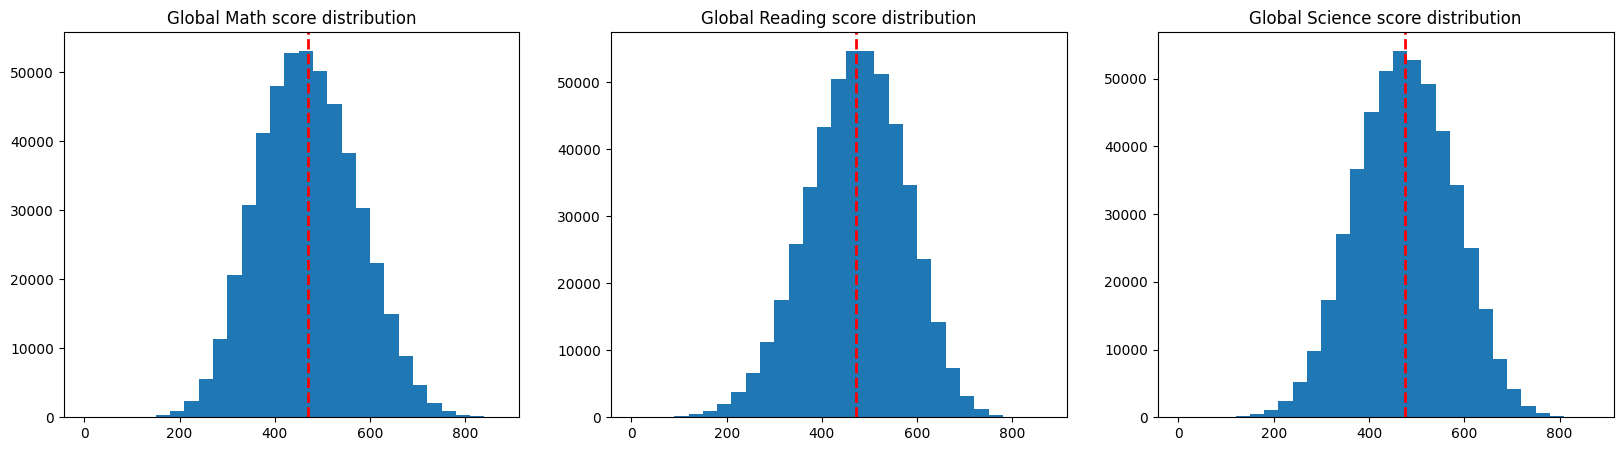

In [37]:
#Checking the distribution of grades in the population
bins = np.arange(0, 900, 30)

plt.figure(figsize = [20, 5])
plt.subplot(1, 3, 1)
plt.hist(df["score_math"], bins=bins)
plt.axvline(df["score_math"].mean(), color='r', linestyle='dashed', linewidth=2);
plt.title("Global Math score distribution")

plt.subplot(1, 3, 2)
plt.hist(df["score_reading"], bins=bins)
plt.axvline(df["score_reading"].mean(), color='r', linestyle='dashed', linewidth=2);
plt.title("Global Reading score distribution")

plt.subplot(1, 3, 3)
plt.hist(df["score_science"], bins=bins)
plt.axvline(df["score_science"].mean(), color='r', linestyle='dashed', linewidth=2);
plt.title("Global Science score distribution");

#### It is evident that the distribution of the scores of the three subjects is a normal distribution, it also seems that the global average score is quite similar between the subjects.

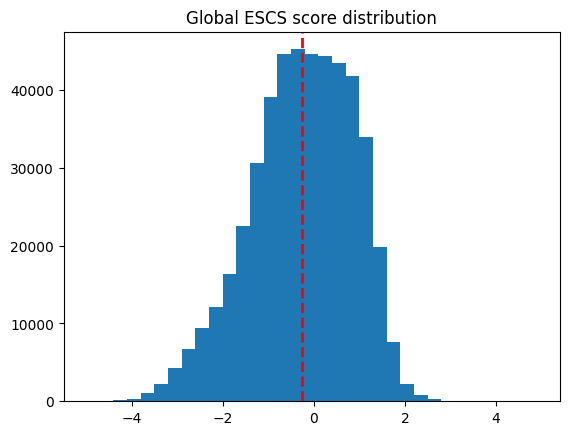

In [38]:
#Examining the distribution of the ESCS score in the population
bins = np.arange(-5, 5, 0.3)
plt.hist(df["escs"], bins=bins)
plt.axvline(df["escs"].mean(), color='r', linestyle='dashed', linewidth=2);
plt.title("Global ESCS score distribution");

#### It seems that the ESCS (socio-economic index) is negatively skewed

In [39]:
#Creating a column that calculates the student's grade point average
df["total_mean_score"]= (df["score_math"]+ df["score_reading"]+ df["score_science"])/3
df["total_mean_score"]

0         332.708000
1         480.476400
2         478.047567
3         466.088033
4         351.751467
             ...    
485485    499.073967
485486    516.201333
485487    491.577367
485488    522.426100
485489    510.997400
Name: total_mean_score, Length: 485490, dtype: float64

In [40]:
#Calculation of the average grade point average of group by countries
country_group = df.groupby("country")["total_mean_score"].mean()
country_group = country_group.reset_index(name ="mean")
#Arranging the table in descending order will affect how the graph is displayed
country_group = country_group.sort_values("mean", ascending=False)

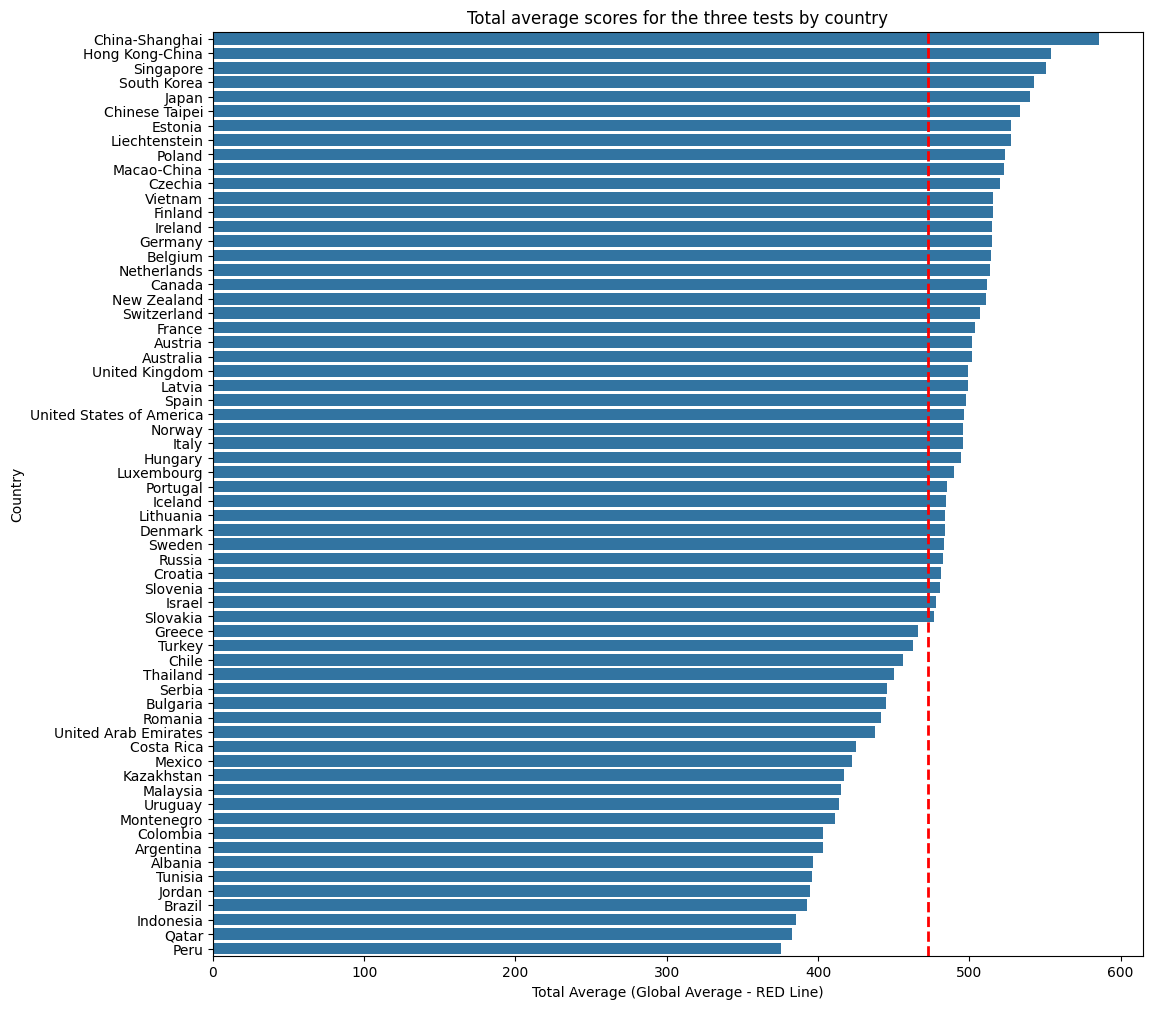

In [41]:
plt.figure(figsize = [12, 12])
sb.barplot(data =country_group, x="mean" ,y="country", color=sb.color_palette()[0])
plt.axvline(df["total_mean_score"].mean(), color='r', linestyle='dashed', linewidth=2);
plt.title("Total average scores for the three tests by country")
plt.xlabel("Total Average (Global Average - RED Line)")
plt.ylabel("Country");

#### In the Bar Plot above, we can see the refined average scores in each country that participated in the study, it's nice to see that Israel my country is very average.

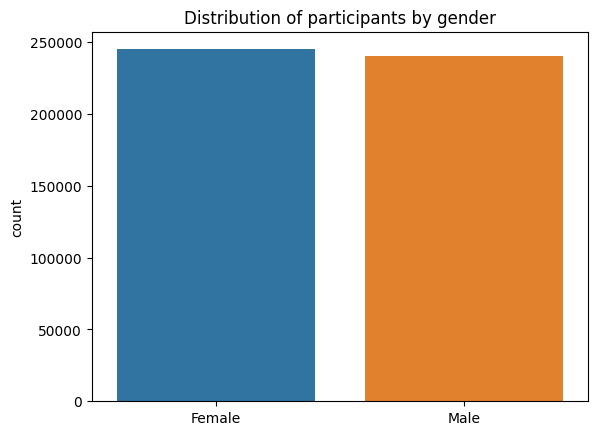

In [42]:
sb.countplot(data = df, x ="gender" )
plt.xlabel("")
plt.title("Distribution of participants by gender");

#### Female and Male are equally distributed in research.

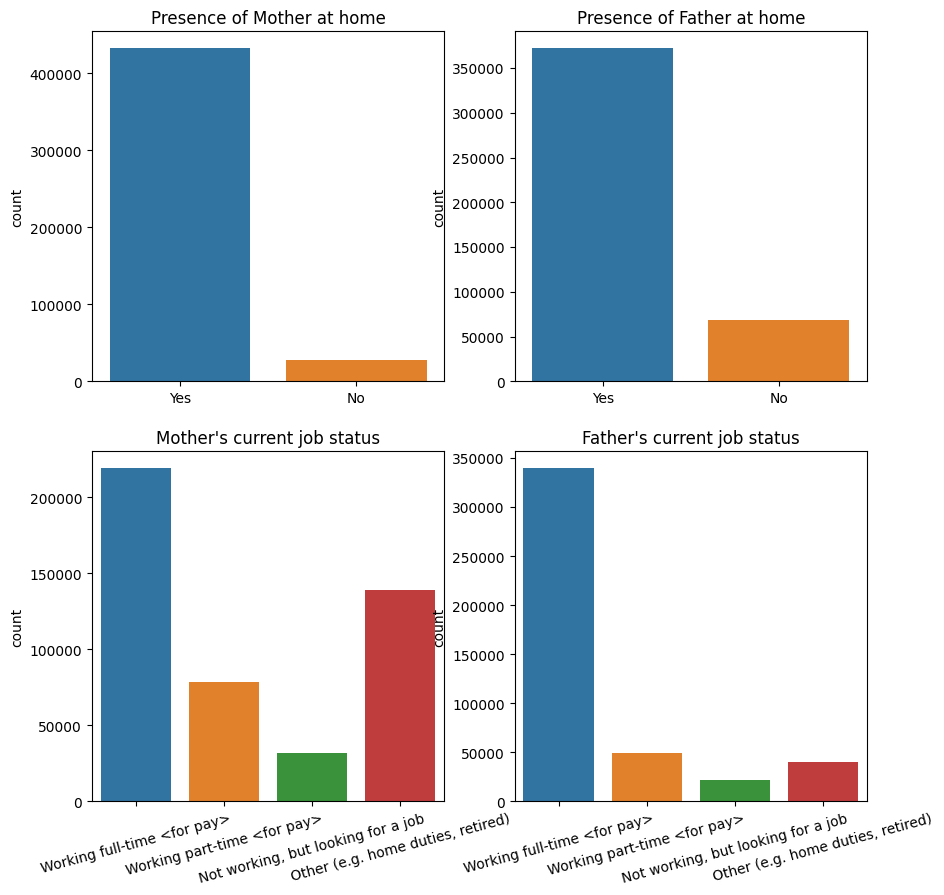

In [43]:
fig = plt.figure(figsize = (10,10))
plt.subplot(2, 2, 1)
sb.countplot(data = df, x ="mother_at_home" )
plt.xlabel("")
plt.title("Presence of Mother at home");

plt.subplot(2, 2, 2)
sb.countplot(data = df, x ="father_at_home" )
plt.xlabel("")
plt.title("Presence of Father at home");

plt.subplot(2, 2, 3)
sb.countplot(data = df, x ="mother_current_job" )
plt.xlabel("")
plt.title("Mother's current job status")
plt.xticks(rotation = 15);

plt.subplot(2, 2, 4)
sb.countplot(data = df, x ="father_current_job")
plt.xlabel("")
plt.title("Father's current job status")
plt.xticks(rotation = 15);

#### At the global level, most of the students' parents are present at home and work full time

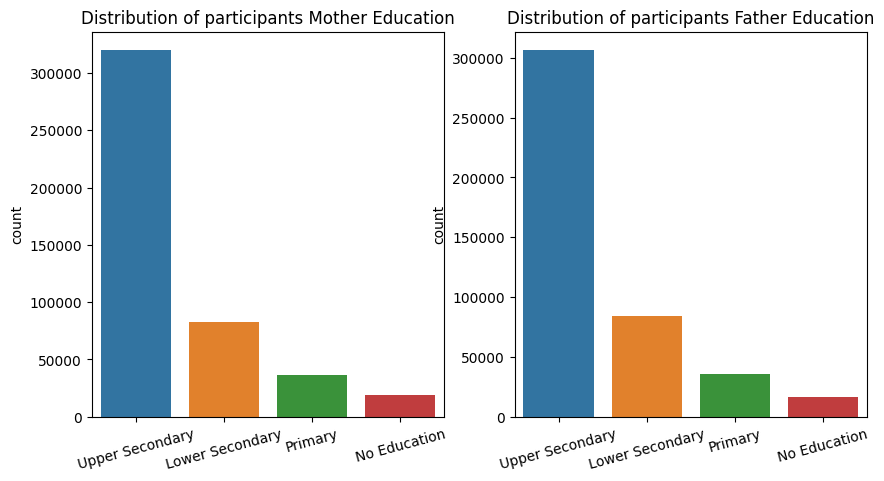

In [44]:
plt.figure(figsize = [10, 5])
plt.subplot(1, 2, 1)
sb.countplot(data = df, x ="mother_education" )
plt.title("Distribution of participants Mother Education");
plt.xlabel("")
plt.xticks(rotation=15);
plt.subplot(1, 2, 2)
sb.countplot(data = df, x ="father_education" )
plt.title("Distribution of participants Father Education");
plt.xlabel("")
plt.xticks(rotation=15);

#### At the global level, most of the students' parents have a Upper Secondary level of education

In [45]:
oecd_group = df.groupby("country")
oecd_group = oecd_group["oecd"].value_counts()
oecd_group = pd.DataFrame(oecd_group)
oecd_group = oecd_group.drop("oecd",axis=1).reset_index()

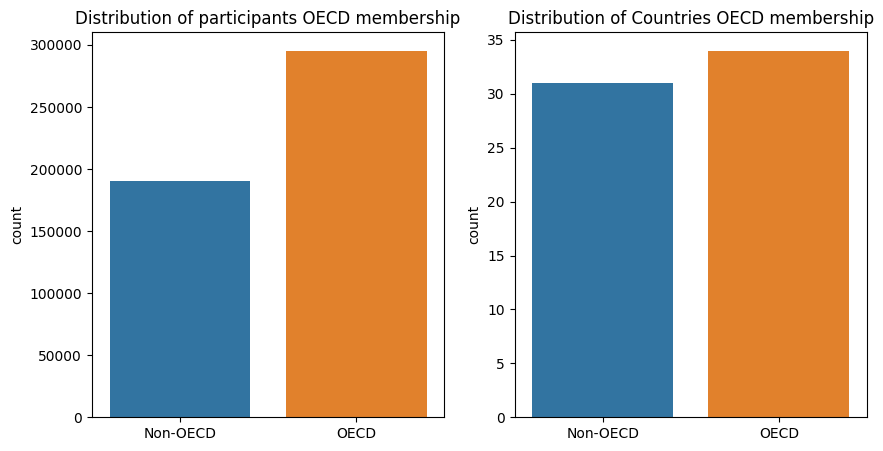

In [46]:
plt.figure(figsize = [10, 5])
plt.subplot(1, 2, 1)
sb.countplot(data = df, x ="oecd" )
plt.title("Distribution of participants OECD membership");
plt.xlabel("")
plt.subplot(1, 2, 2)
sb.countplot(data = oecd_group, x ="oecd" )
plt.xlabel("")
plt.title("Distribution of Countries OECD membership");

#### It seems that despite a small gap in the amount in favor of the OECD member countries, in 2012 there is a clear majority of subjects from the OECD countries.

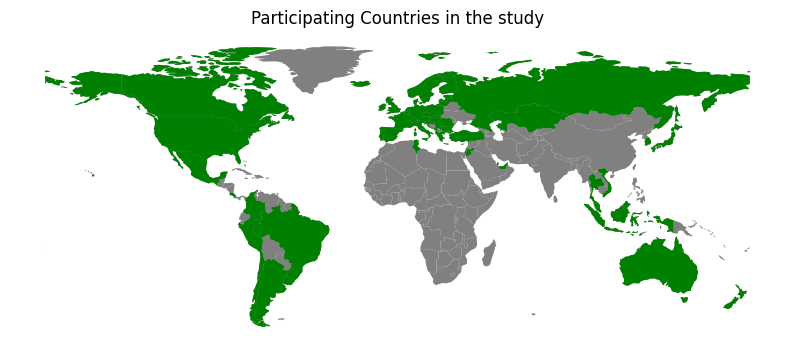

In [47]:
#In geopandas library it is possible to layer graphs
# and thus display the countries that participated in the study above the countries that did not (in gray).
fig, ax = plt.subplots(figsize =(10,8))
world.plot(ax =ax , color ="gray")
world[world["name"].isin(df["country"].unique())].plot(ax =ax , color ="green")
plt.title("Participating Countries in the study")
ax.set_axis_off();

#### In 2012 there are few countries from the southern hemisphere participating in the study.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The data distribution is expected for such a large database, the database is very organized and did not require corrections on my part. I was required to read documents related to the database in order to know how to "filter" the information effectively, this information exists and is accessible online.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distribution of the ESCS of the participants skewes to the right. I estimate that further tests will give meaning to this tendency.
There was no need to organize or clean up the Data beyond filtering it down to my areas of interest.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

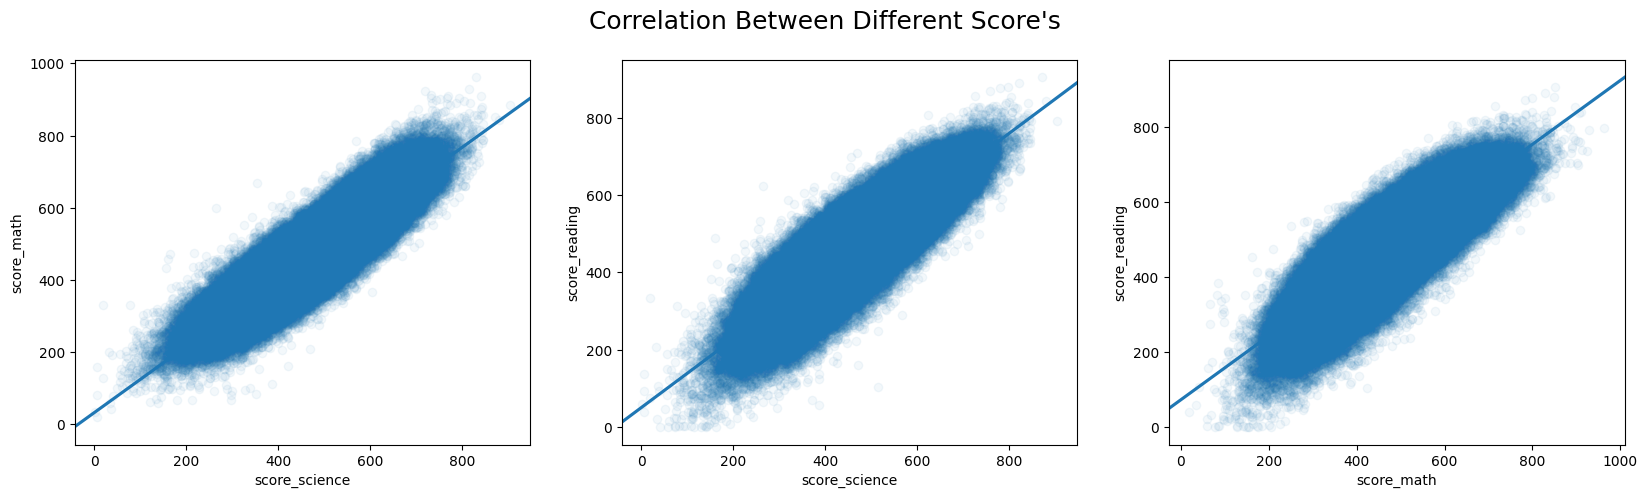

In [48]:
plt.figure(figsize = [20, 5])
#The large amount of information requires me to create transparet (alpha) points so the trend can be seen.
plt.suptitle("Correlation Between Different Score's",fontsize=18)
plt.subplot(1, 3, 1)
sb.regplot(data = df, x = 'score_science', y = 'score_math', truncate=False, scatter_kws={'alpha':1/20})
plt.subplot(1, 3, 2)
sb.regplot(data = df, x = 'score_science', y = 'score_reading', truncate=False, scatter_kws={'alpha':1/20})
plt.subplot(1, 3, 3)
sb.regplot(data = df, x = 'score_math', y = 'score_reading', truncate=False, scatter_kws={'alpha':1/20});

In [49]:
df[["score_science","score_math","score_reading", "total_mean_score"]].corr(method='pearson')

,score_science,score_math,score_reading,total_mean_score
score_science,1.000000,0.902927,0.877728,0.966309
score_math,0.902927,1.000000,0.857112,0.959729
score_reading,0.877728,0.857112,1.000000,0.950682
total_mean_score,0.966309,0.959729,0.950682,1.000000


#### It seems that on a large enough scale there is a high correlation between the results of the various tests. 
#### For this step, I will compare categorical factors against the Total Mean Score of each subject.

#### I want to produce several violin charts to check the distribution of scores according to different categories, for my convenience I will create a User-defined function for reuse.

In [50]:
#Custom function to create a violin graph with several colors.
def mean_score_violin(data,category):
    sb.violinplot(data=data, x=category, y='total_mean_score', inner='quartile')
    plt.ylim(0 ,900)
    plt.ylabel("Total Mean Score")
    plt.xlabel("");

### The use of graphs with multiple colors is intended to make it easier for the reader to easily understand adjacent graphs that present similar information about different categories.

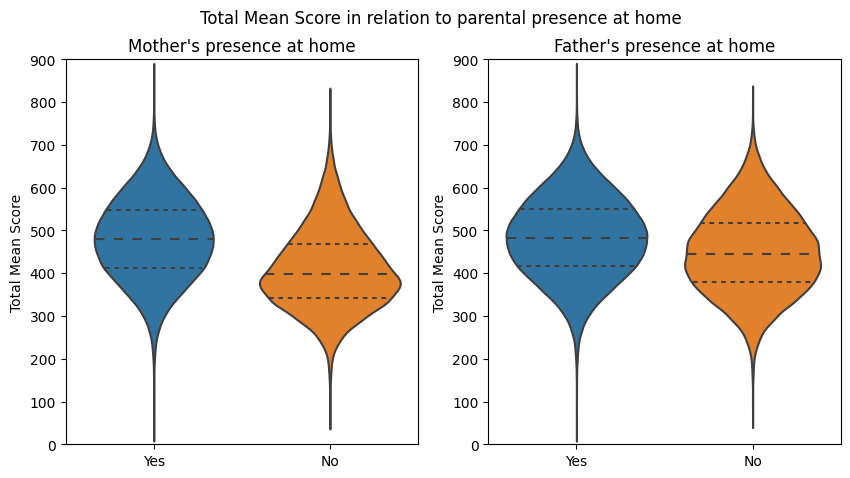

In [51]:
plt.figure(figsize = [10, 5])
plt.suptitle("Total Mean Score in relation to parental presence at home")
plt.subplot(1, 2, 1)
mean_score_violin(df,"mother_at_home")
plt.title("Mother's presence at home")
plt.subplot(1, 2, 2)
mean_score_violin(df,"father_at_home")
plt.title("Father's presence at home");

#### There is a significant correlation of mother's presence at home on the student's grades. The correlation between the presence of a father at home on the student's grades exists but is significantly weaker.

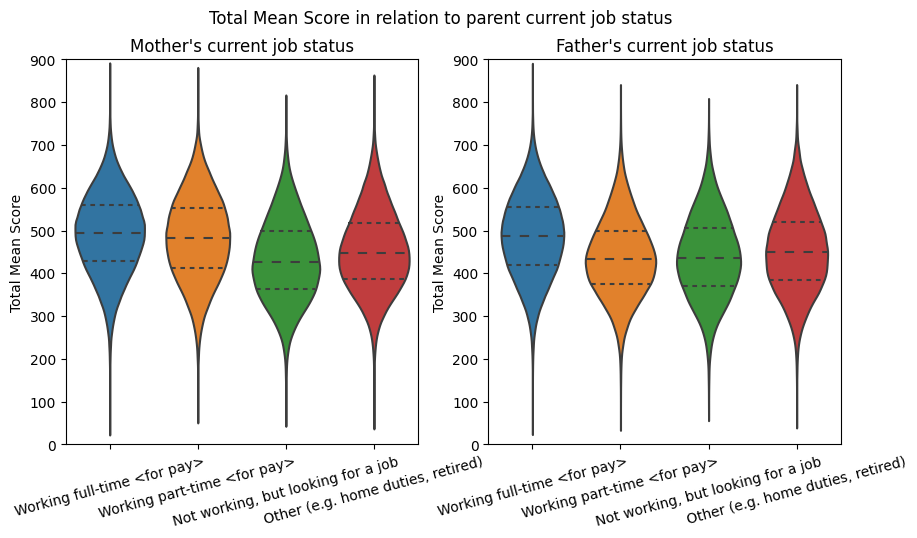

In [52]:
plt.figure(figsize = [10, 5])
plt.suptitle("Total Mean Score in relation to parent current job status")
plt.subplot(1, 2, 1)
mean_score_violin(df,"mother_current_job")
plt.title("Mother's current job status")
plt.xticks(rotation=15)
plt.subplot(1, 2, 2)
mean_score_violin(df,"father_current_job")
plt.title("Father's current job status")
plt.xticks(rotation=15);

#### It seems that the job status of the parents also has an effect on the student's grades, it is interesting to see that there is almost no difference in the effect between the mother's full-time and part-time work.

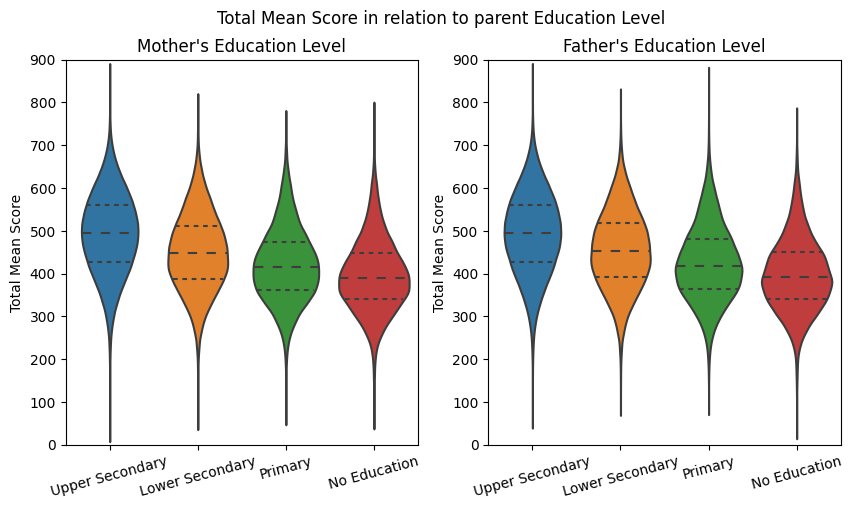

In [53]:
plt.figure(figsize = [10, 5])
plt.suptitle("Total Mean Score in relation to parent Education Level")
plt.subplot(1, 2, 1)
mean_score_violin(df,"mother_education")
plt.title("Mother's Education Level");
plt.xticks(rotation=15);
plt.subplot(1, 2, 2)
mean_score_violin(df,"father_education")
plt.title("Father's Education Level")
plt.xticks(rotation=15);

#### Also regarding the Education Level of the parents, a clear correlation can be seen with the student's grades, and again a greater influence of the mother can be seen.

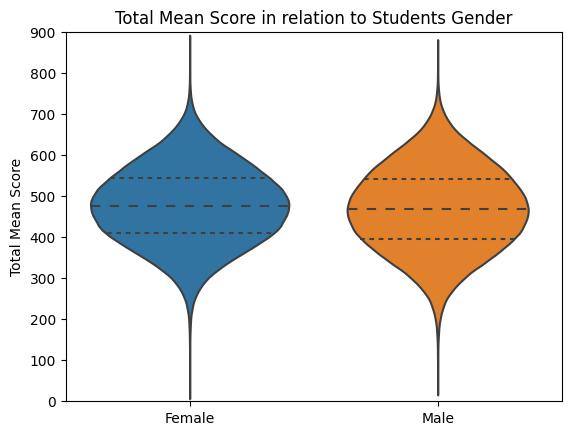

In [54]:
mean_score_violin(df,"gender")
plt.title("Total Mean Score in relation to Students Gender");

#### It seems that at the global level the gender of the student has no significant effect on his grades.

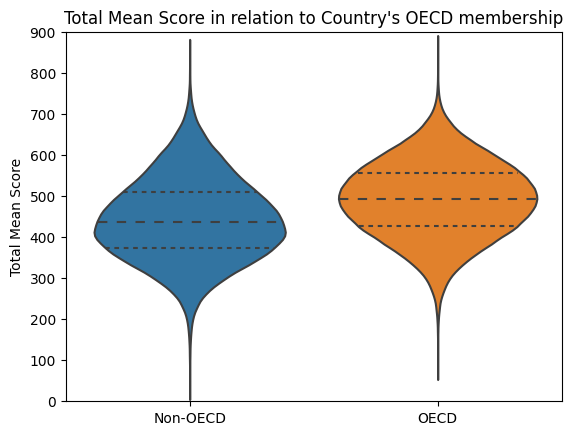

In [55]:
mean_score_violin(df,"oecd")
plt.title("Total Mean Score in relation to Country's OECD membership");

#### Not surprisingly, the average grades of students from OECD countries are higher.

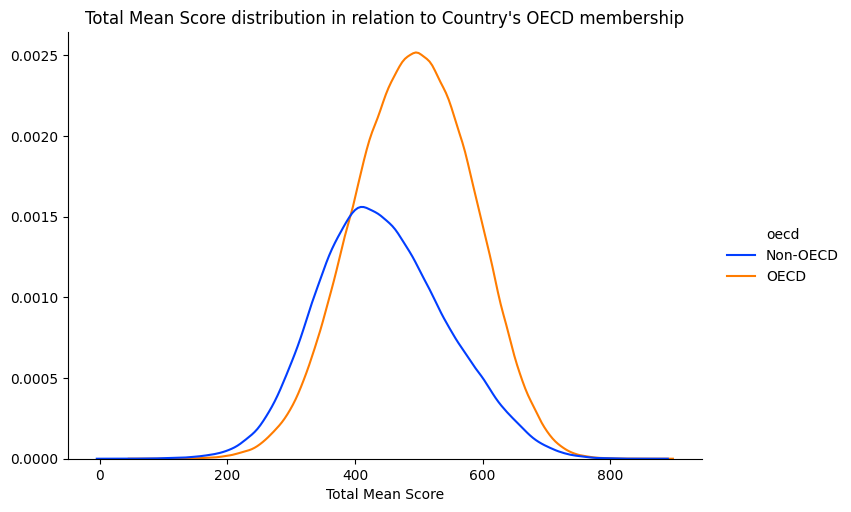

In [56]:
sb.displot(data=df, x="total_mean_score", hue='oecd', kind='kde', fill=False, palette='bright', height=5, aspect=1.5)
plt.title("Total Mean Score distribution in relation to Country's OECD membership");
plt.xlabel("Total Mean Score")
plt.ylabel("");

#### Here, in addition to the mean difference , you can see that in this database there are more students from OECD countries.

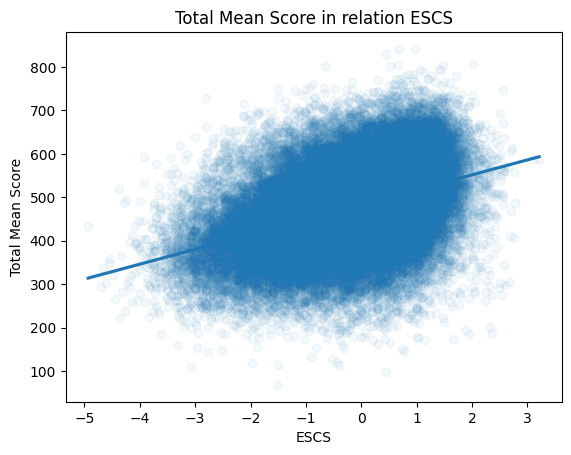

In [57]:
sb.regplot(data = df.sample(frac=0.1, random_state=1), x = "escs", y= "total_mean_score",
          x_jitter =0.0000 , fit_reg=True, scatter_kws={'alpha':1/20})
plt.xlabel("ESCS")
plt.ylabel("Total Mean Score");
plt.title("Total Mean Score in relation ESCS");

#### A clear correlation can be seen between socioeconomic status (ESCS) and the student's grades.

In [58]:
country_group = df.groupby("country")["total_mean_score"].mean()
country_group = country_group.reset_index(name ="country_mean_score")
country_group = country_group.rename (columns = {"country":"name"})

In [59]:
pworld = world[world["name"].isin(df["country"].unique())]

In [60]:
pworld = pd.merge(pworld, country_group, on="name")

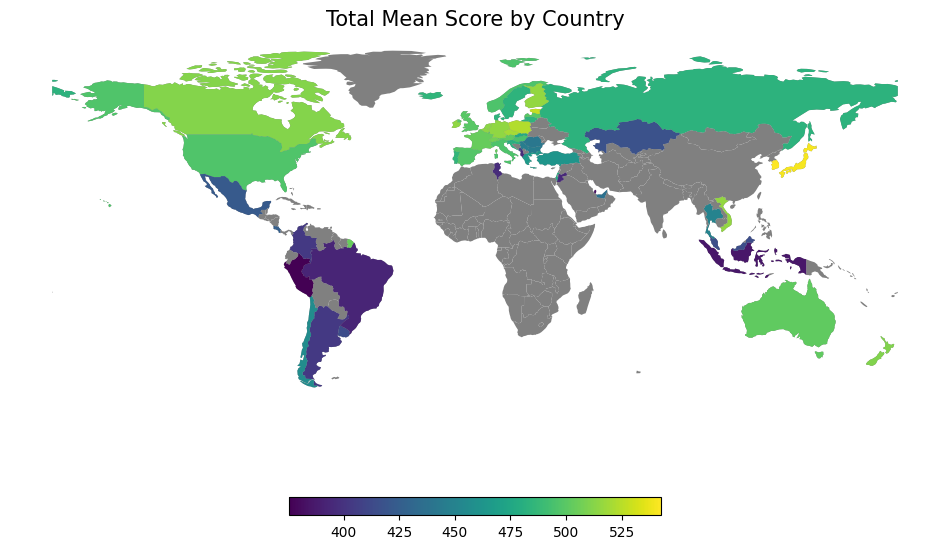

In [61]:
fig, ax = plt.subplots(figsize =(12,8))
world.plot(ax =ax , color ="gray")
pworld.plot(column='country_mean_score', legend=True,ax=ax, legend_kwds={'orientation': "horizontal", 'shrink': 0.4});
plt.title("Total Mean Score by Country",fontsize=15)
ax.set_axis_off();

#### The world map helps me make the average grades in the various countries accessible to the reader.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Parental presence in the student's home is significant for his grade point average, it stood out to me how much a mother's lack of presence affects the grade point average.

> At the international level it does not seem that there is a difference between the scores of boys and girls, it would be interesting to check if there is a difference in smaller segments without the data

> It is not surprising that there is a difference in the average scores among the OECD countries.

> It is clear that there is a relationship between ESCS and Total grade point average, it would be interesting to check this relationship in different categories of students.

> It's nice to see the distribution of the average scores on a world map, it doesn't help me interpret the information more than plot's I've already created, but the practice was interesting.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> no

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

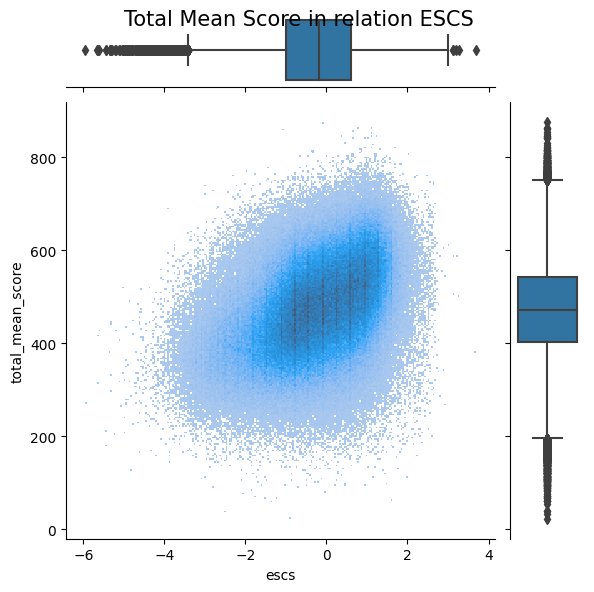

In [62]:
g = sb.JointGrid(data=df, x="escs", y="total_mean_score")
g.plot_joint(sb.histplot)
g.plot_marginals(sb.boxplot)
plt.suptitle("Total Mean Score in relation ESCS",fontsize=15);

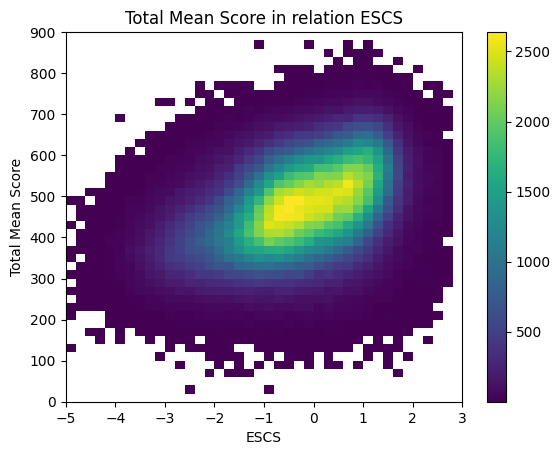

In [63]:
bins_y = np.arange(0, df["total_mean_score"].max()+ 20 , 20)
bins_x = np.arange(-5, 3, 0.2)
plt.hist2d(data = df, x = 'escs', y = 'total_mean_score' ,bins = [bins_x, bins_y], cmap = 'viridis', cmin = 0.2);
plt.colorbar()
plt.ylim(0 ,900)
plt.xlim(-5 ,3)
plt.title("Total Mean Score in relation ESCS")
plt.xlabel("ESCS")
plt.ylabel("Total Mean Score");

#### In the heat map you can clearly see where most of the subjects are, it is quite clear that there is a correlation between the average score and the student's ESCS status.

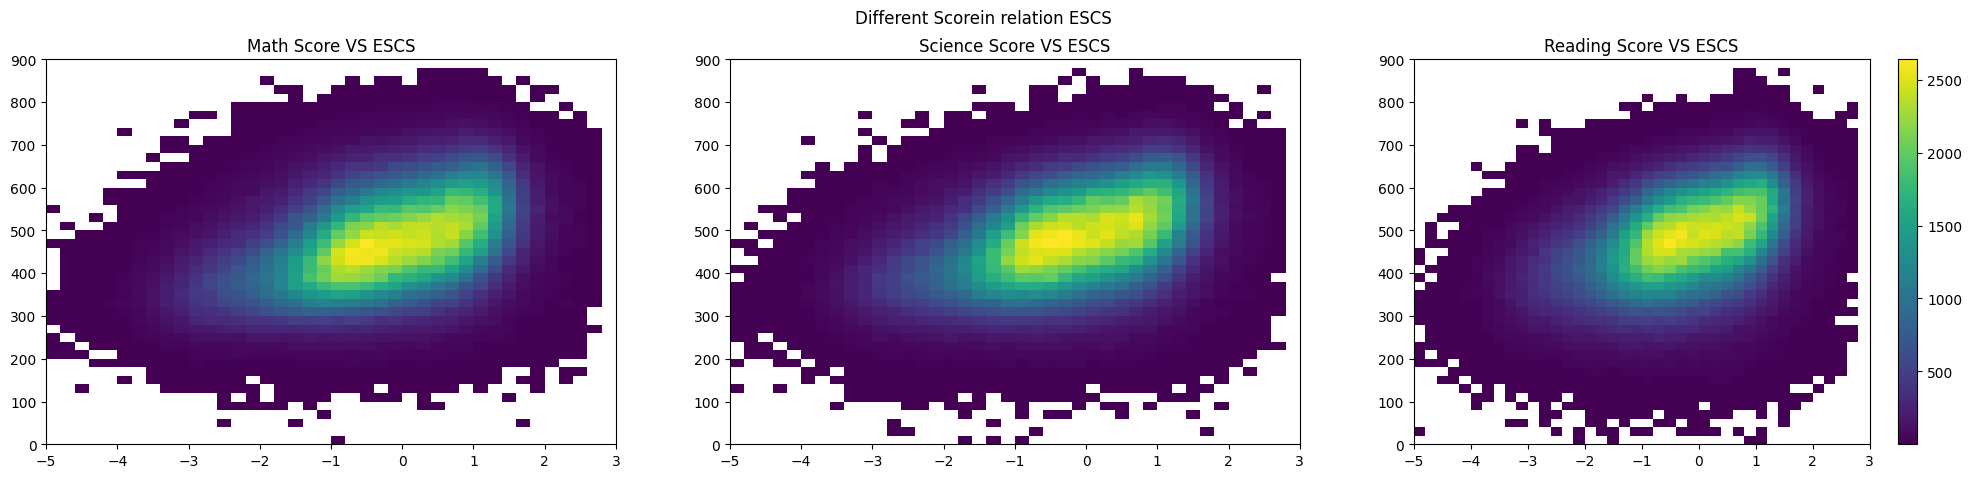

In [64]:
plt.figure(figsize = [25, 5])
plt.suptitle("Different Scorein relation ESCS")
plt.subplot(1, 3, 1)
bins_y = np.arange(0, df["total_mean_score"].max()+ 20 , 20)
bins_x = np.arange(-5, 3, 0.2)
plt.hist2d(data = df, x = 'escs', y = 'score_math' , cmap = 'viridis', cmin = 0.4 ,bins = [bins_x, bins_y]);
plt.title("Math Score VS ESCS")
plt.ylim(0 ,900)
plt.xlim(-5 ,3)
plt.subplot(1, 3, 2)
plt.hist2d(data = df, x = 'escs', y = 'score_science' , cmap = 'viridis', cmin = 0.4 ,bins = [bins_x, bins_y]);
plt.title("Science Score VS ESCS")
plt.ylim(0 ,900)
plt.xlim(-5 ,3)
plt.subplot(1, 3, 3)
plt.hist2d(data = df, x = 'escs', y = 'score_reading' , cmap = 'viridis', cmin = 0.4 ,bins = [bins_x, bins_y]);
plt.title("Reading Score VS ESCS")
plt.colorbar()
plt.ylim(0 ,900)
plt.xlim(-5 ,3);

In [65]:
df[["score_math","score_science","score_reading","total_mean_score" , "escs"]].corr(method='pearson')

,score_math,score_science,score_reading,total_mean_score,escs
score_math,1.000000,0.902927,0.857112,0.959729,0.400454
score_science,0.902927,1.000000,0.877728,0.966309,0.395018
score_reading,0.857112,0.877728,1.000000,0.950682,0.378540
total_mean_score,0.959729,0.966309,0.950682,1.000000,0.408222
escs,0.400454,0.395018,0.378540,0.408222,1.000000


#### Just before I continue, it was important for me to check the correlation of each profession against the socioeconomic situation, it seems that there are minor changes, I will not go into them at this stage.

### I have the question of whether this correlation is equal between the countries, first I will check the differences between the OECD countries and  Non-OECD countries.

In [66]:
#A custom function for creating a violin graph and choosing a solid color.
def mean_score_violin1(data,category,i):
    sb.violinplot(data=data, x=category, y='total_mean_score', inner='quartile', color=sb.color_palette()[i])
    plt.ylim(0 ,900)
    plt.ylabel("Total Mean Score")
    plt.xlabel("");

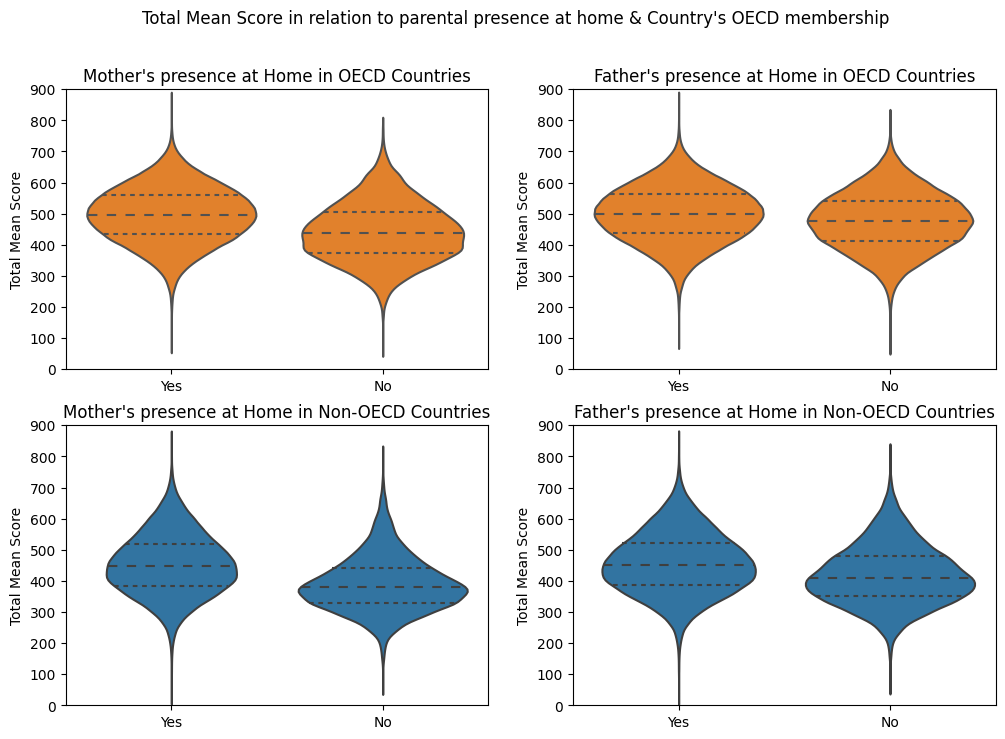

In [67]:
fig, axes = plt.subplots(figsize=(12, 8))
plt.suptitle("Total Mean Score in relation to parental presence at home & Country's OECD membership")
plt.subplot(2, 2, 1)
mean_score_violin1(df[df["oecd"]=="OECD"], "mother_at_home", 1)
plt.title("Mother's presence at Home in OECD Countries")
plt.subplot(2, 2, 2)
mean_score_violin1(df[df["oecd"]=="OECD"], "father_at_home", 1)
plt.title("Father's presence at Home in OECD Countries")
plt.subplot(2, 2, 3)
mean_score_violin1(df[df["oecd"]!="OECD"], "mother_at_home", 0)
plt.title("Mother's presence at Home in Non-OECD Countries")
plt.subplot(2, 2, 4)
mean_score_violin1(df[df["oecd"]!="OECD"], "father_at_home", 0)
plt.title("Father's presence at Home in Non-OECD Countries");

#### It seems that the absence of parental presence at home has less effect on students' grades in OECD countries.

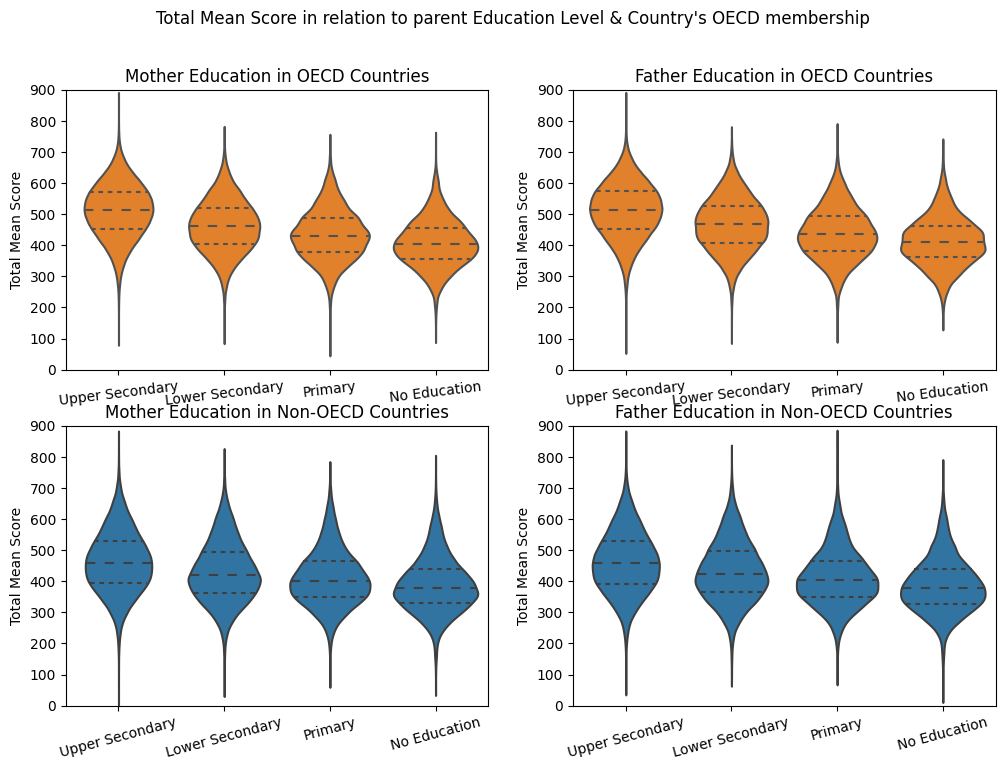

In [68]:
fig, axes = plt.subplots(figsize=(12, 8))
plt.suptitle("Total Mean Score in relation to parent Education Level & Country's OECD membership ")
plt.subplot(2, 2, 1)
mean_score_violin1(df[df["oecd"]=="OECD"], "mother_education", 1)
plt.title("Mother Education in OECD Countries")
plt.xticks(rotation=7)
plt.subplot(2, 2, 2)
mean_score_violin1(df[df["oecd"]=="OECD"], "father_education", 1)
plt.xticks(rotation=7)
plt.title("Father Education in OECD Countries")
plt.subplot(2, 2, 3)
mean_score_violin1(df[df["oecd"]!="OECD"], "mother_education", 0)
plt.xticks(rotation=15)
plt.title("Mother Education in Non-OECD Countries")
plt.subplot(2, 2, 4)
mean_score_violin1(df[df["oecd"]!="OECD"], "father_education", 0)
plt.xticks(rotation=15)
plt.title("Father Education in Non-OECD Countries");

#### It is clear that the grades in the OECD countries are higher, but at least visually you cannot see a significant difference in the strength of the relationship between the parent's education and the student's grades between the types of countries.

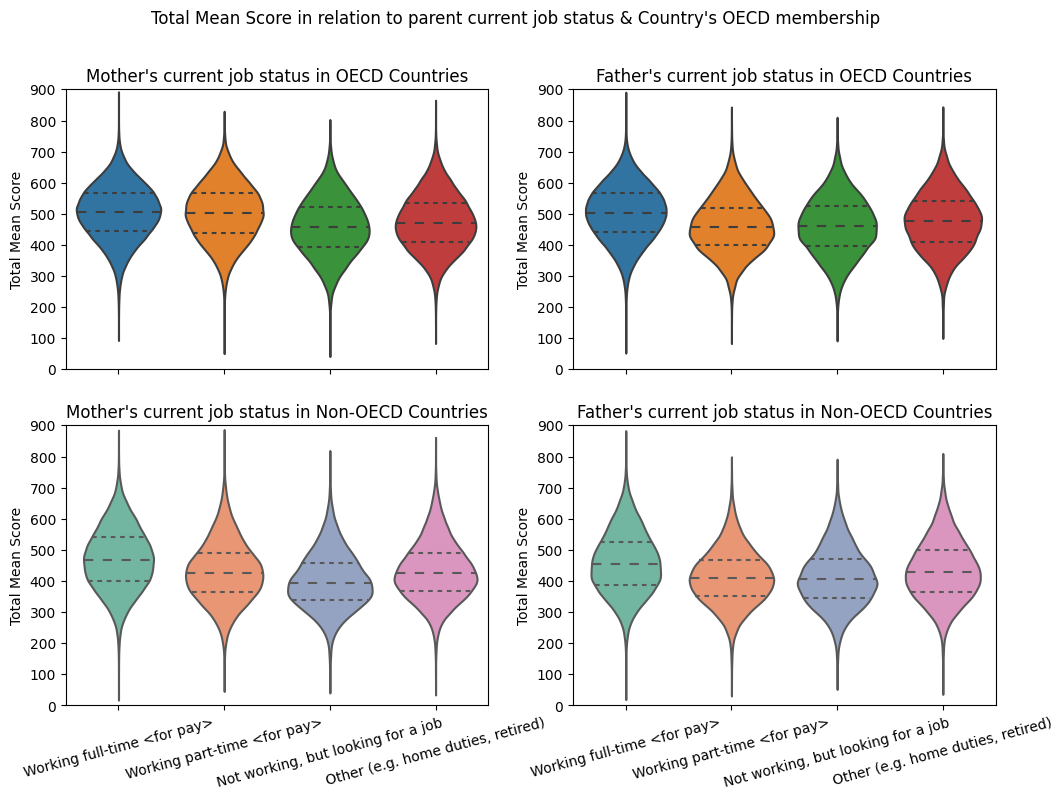

In [69]:
fig, axes = plt.subplots(figsize=(12, 8))
plt.suptitle("Total Mean Score in relation to parent Education Level & Country's OECD membership ")
plt.suptitle("Total Mean Score in relation to parent current job status & Country's OECD membership")
plt.subplot(2, 2, 1)
plt.title("Mother's current job status in OECD Countries")
# .set(xticklabels=[]) deleted the labels on the x-axis because they clashed with the graph below.
sb.violinplot(data=df[df["oecd"]=="OECD"], x='mother_current_job', y='total_mean_score', inner='quartile').set(xticklabels=[])
plt.ylim(0 ,900)
plt.xlabel(" ")
plt.ylabel("Total Mean Score")
plt.subplot(2, 2, 2)
sb.violinplot(data=df[df["oecd"]=="OECD"], x='father_current_job', y='total_mean_score', inner='quartile').set(xticklabels=[])
plt.title("Father's current job status in OECD Countries");
plt.ylim(0 ,900)
plt.xlabel(" ")
plt.ylabel("Total Mean Score")

plt.subplot(2, 2, 3)
plt.title("Mother's current job status in Non-OECD Countries")
sb.violinplot(data=df[df["oecd"]=="Non-OECD"], x='mother_current_job', y='total_mean_score', inner='quartile',palette = "Set2")
plt.ylim(0 ,900)
plt.xticks(rotation=15);
plt.xlabel("")
plt.ylabel("Total Mean Score")
plt.subplot(2, 2, 4)
sb.violinplot(data=df[df["oecd"]=="Non-OECD"], x='father_current_job', y='total_mean_score', inner='quartile',palette = "Set2");
plt.title("Father's current job status in Non-OECD Countries");
plt.ylim(0 ,900)
plt.xlabel("")
plt.ylabel("Total Mean Score")
plt.xticks(rotation=15);

#### Regarding the employment status of the student's parents, it can be seen that in OECD countries there is a slightly weaker relationship than in non-OECD countries.

C:\Users\shalom\anaconda3\envs\env1\lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\shalom\anaconda3\envs\env1\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


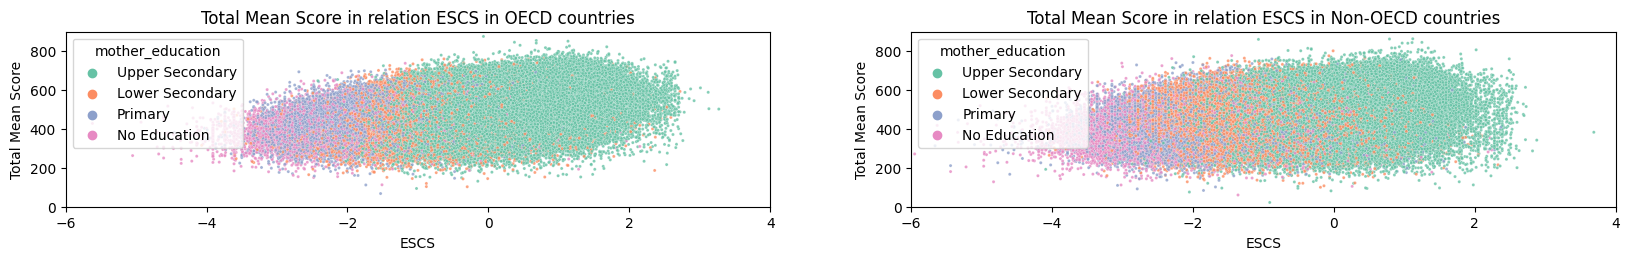

In [70]:
plt.figure(figsize = [20, 5])
plt.subplot(2, 2, 1)
sb.scatterplot(data=df[df["oecd"]=="OECD"], x="escs" , y="total_mean_score" ,hue="mother_education",
              palette = "Set2", alpha =0.8 , s= 5)
plt.title("Total Mean Score in relation ESCS in OECD countries");
plt.xlabel("ESCS")
plt.ylabel("Total Mean Score")
plt.ylim(0 ,900)
plt.xlim(-6 ,4)
plt.subplot(2, 2, 2)
sb.scatterplot(data=df[df["oecd"]!="OECD"], x="escs" , y="total_mean_score" ,hue="mother_education",
              palette = "Set2", alpha =0.8 , s= 5)
plt.title("Total Mean Score in relation ESCS in Non-OECD countries");
plt.xlabel("ESCS")
plt.ylabel("Total Mean Score")
plt.ylim(0 ,900)
plt.xlim(-6 ,4);

#### In this graph, I tried to show the relationship between ESCS status and the student's grades and include the categorical variable "mother's education" in the OECD member countries and those that are not.

#### The clear relative distribution between the colors in the graph sent me to read how the ESCS index is calculated. Now I understand that the index is a combination of many variables (including the mother's education), from here I would like to get to the core of my question: what is the strength of the relationship between socio-economic status (in this case ESCS) and student scores in different countries.

## Continue analysis outside the flow of exploration

In [71]:
country_group = df.groupby("country")["total_mean_score"].mean()
country_group

country
Albania                     396.929516
Argentina                   403.094249
Australia                   501.646252
Austria                     501.947618
Belgium                     514.220996
                               ...    
United Arab Emirates        437.900902
United Kingdom              499.327003
United States of America    496.625438
Uruguay                     414.206183
Vietnam                     515.669027
Name: total_mean_score, Length: 64, dtype: float64

In [72]:
country_group = df.groupby("country")["score_reading"].mean()
country_group = country_group.reset_index(name ="country_score_reading_2012")
country_group = country_group.rename (columns = {"country":"name"})
pworld = pd.merge(pworld, country_group, on="name")

In [73]:
country_group = df.groupby("country")["score_science"].mean()
country_group = country_group.reset_index(name ="country_score_science_2012")
country_group = country_group.rename (columns = {"country":"name"})
pworld = pd.merge(pworld, country_group, on="name")

In [74]:
country_group = df.groupby("country")["score_math"].mean()
country_group = country_group.reset_index(name ="country_score_math_2012")
country_group = country_group.rename (columns = {"country":"name"})
pworld = pd.merge(pworld, country_group, on="name")

In [75]:
for c in pworld["name"]:
    pworld.loc[pworld["name"]==c, "escs_to_score_corr"] = df[df["country"]==c][["escs","total_mean_score"]].corr().iloc[1,0]
    pworld.loc[pworld["name"]==c, "oecd"] = df[df["country"]==c]["oecd"].iloc[0]

> It is clear to me that the plots below are bivariate and not multivariate, but in the sequence of the questions I asked and the answers the graphs provided me, their natural place is at the end of the analysis.

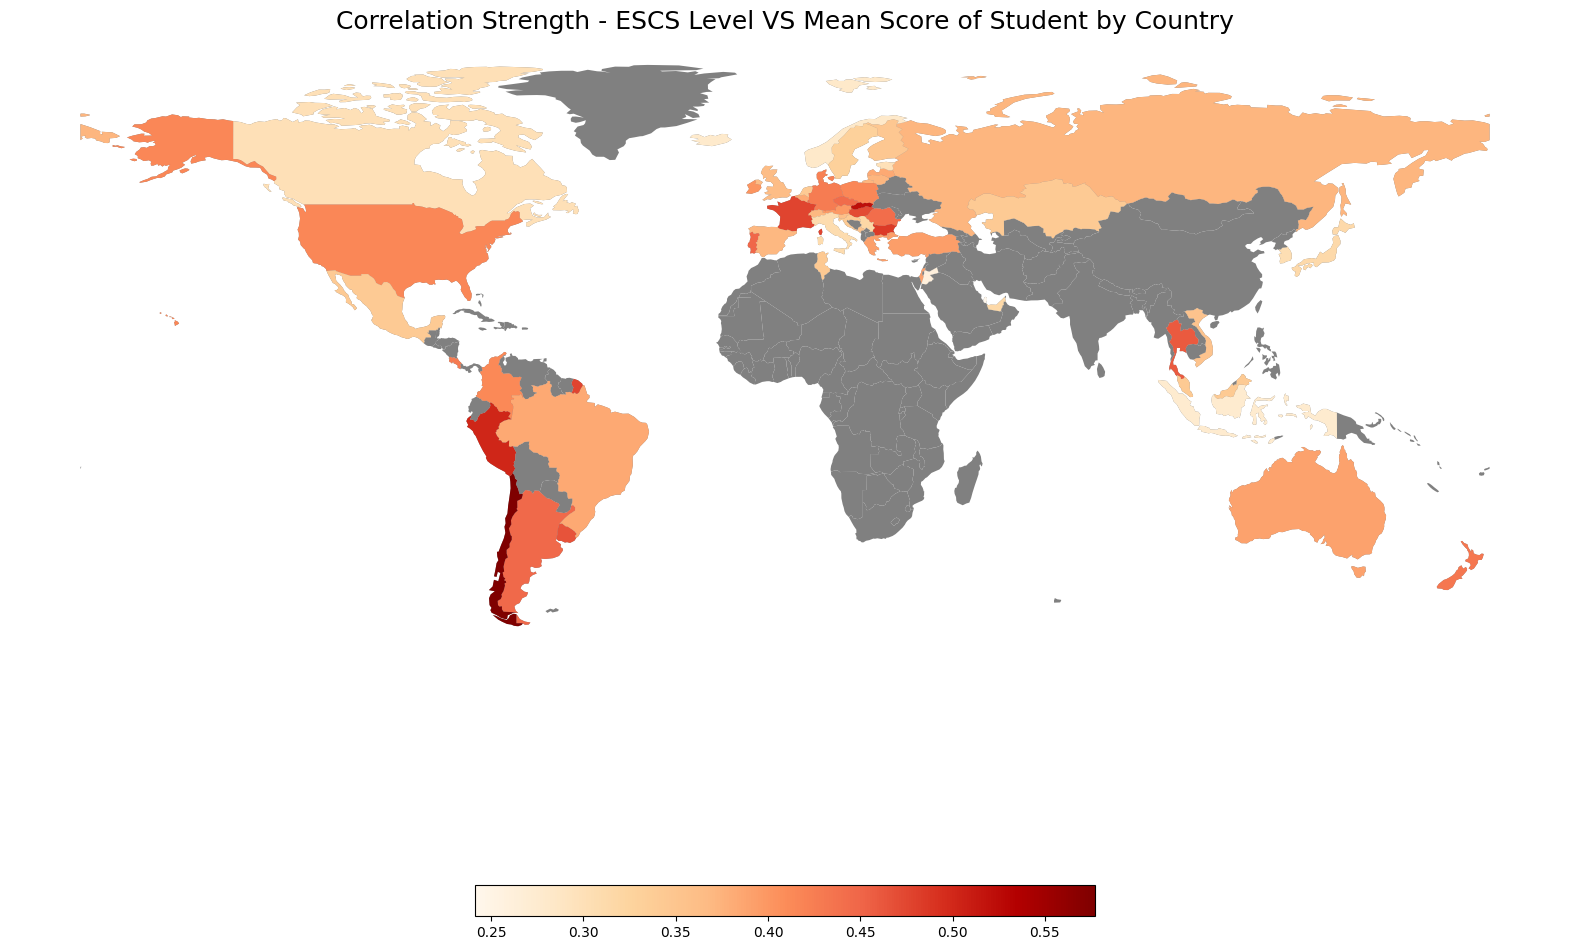

In [76]:
fig, ax = plt.subplots(figsize =(20,20))
world.plot(ax =ax , color ="gray")
pworld.plot(column='escs_to_score_corr', legend=True,ax=ax, cmap ="OrRd"
                                           ,legend_kwds={'orientation': "horizontal", 'shrink': 0.4});
plt.title("Correlation Strength - ESCS Level VS Mean Score of Student by Country",fontsize=18)
ax.set_axis_off();

### From this graph it can be learned that the strength of the correlation between ESCS and the student's grades is different between the countries, starting from a weak correlation to a moderat-strong correlation.

In [77]:
p = pworld.sort_values("escs_to_score_corr", ascending=False)

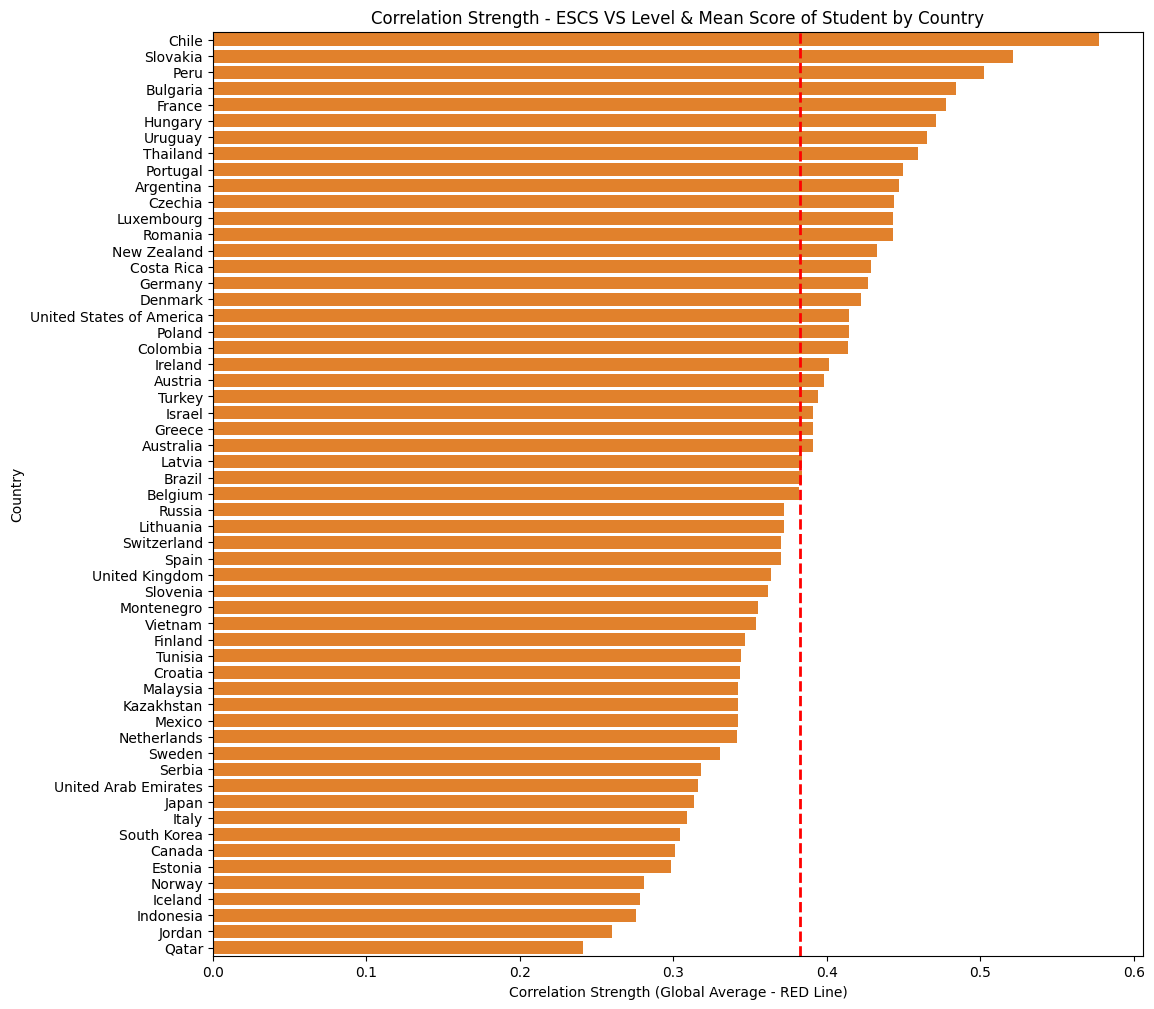

In [78]:
plt.figure(figsize = [12, 12])
sb.barplot(data =p.iloc[0:-1], x="escs_to_score_corr" ,y="name", color=sb.color_palette()[1])
plt.axvline(p["escs_to_score_corr"].mean(), color='r', linestyle='dashed', linewidth=2);
plt.title("Correlation Strength - ESCS VS Level & Mean Score of Student by Country")
plt.xlabel("Correlation Strength (Global Average - RED Line)")
plt.ylabel("Country");

### And in this bar graph you can see the strength of the correlation in the countries against the average correlation in the world. This makes it easier for the reader to find his country and compare it to others.

Downloading the processed databases in order to create the slide show

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I am particularly interested in the relationship between socioeconomic status and the test score, I tried to approach the subject from several directions and after examining several directions I discovered that the ESCS score is a calculation by PISA researchers that contains a large number of components including the categorical indices that I analyzed.
> 

### Were there any interesting or surprising interactions between features?

> As a graduate of a bachelor's degree in education, the data revealed did not particularly surprise me.
> I was a little surprised to see that the absence of Father's presence at home had so little effect.


## Conclusions
I chose this database because of my background in education.
Because of the enormous scope of the database, my interests quickly sent me to try and test whether there is a relationship between the extent of inequality in a country and its student outcomes. It took me some time, but in the end I realized that looking only at 2012 does not allow me to do such an examination.
I do estimate, cautiously, that with the help of the analysis I performed it is possible to get an assessment of the countries' ability to provide quality education to all children regardless of their economic status.


I would be happy to test the strength of the correlation between ESCS and Total Mean Score over time and examine whether in certain countries there is a clear trend of increasing or decreasing the correlation alongside changes in student achievement